In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('Chapter5_ROP_DataSet.csv')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hole Depth,7934.0,10487.930804,2289.973781,6524.000,8500.250,10487.500,12469.750,14454.00
Hook Load,7934.0,129.672107,7.724432,107.200,123.800,129.500,134.400,156.40
Rotary RPM,7934.0,65.961054,24.280720,9.000,49.000,70.000,90.000,101.00
Rotary Torque,7934.0,11.459822,3.386672,2.701,9.096,11.373,14.198,20.05
Weight on Bit,7934.0,19.826758,5.611785,0.000,16.300,20.400,23.900,39.40
Differential Pressure,7934.0,520.255067,142.477894,2.900,429.350,565.900,627.700,783.30
Gamma at Bit,7934.0,211.783237,81.536917,54.120,148.240,204.710,235.290,600.00
Rate Of Penetration,7934.0,143.107280,55.738087,1.610,100.160,161.160,185.240,259.29


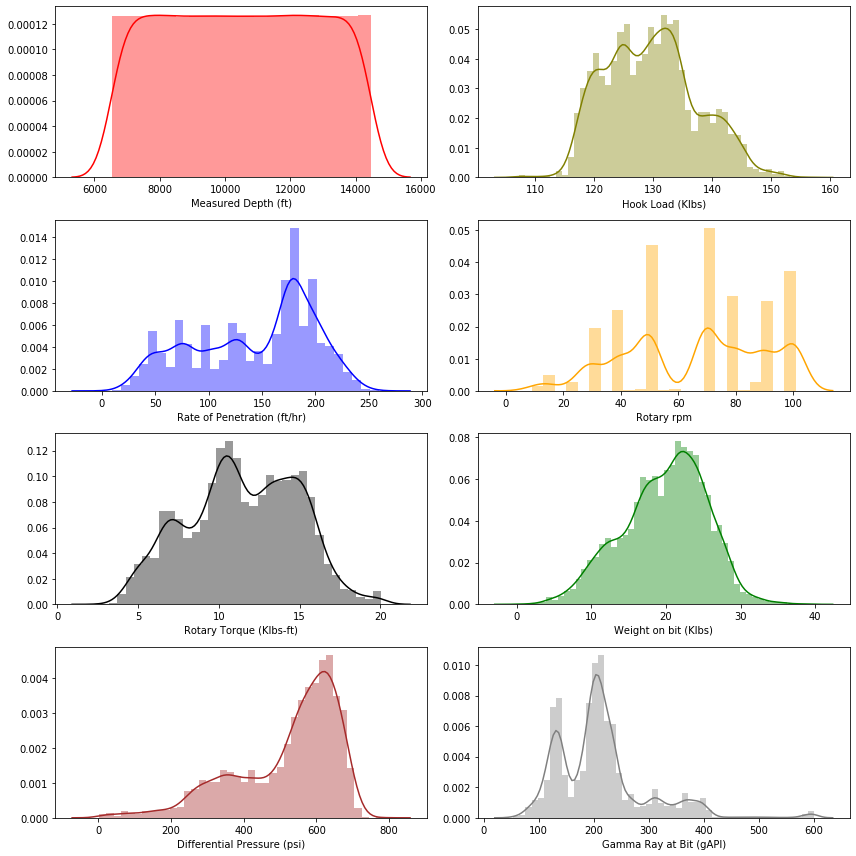

In [2]:
f, axes =plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Hole Depth'], color="red", ax=axes[0, 0],
axlabel='Measured Depth (ft)')
sns.distplot(df['Hook Load'], color="olive", ax=axes[0, 1],
axlabel='Hook Load (Klbs)')
sns.distplot(df['Rate Of Penetration'], color="blue", ax=axes
[1, 0],axlabel='Rate of Penetration (ft/hr)')
sns.distplot(df['Rotary RPM'], color="orange", ax=axes[1, 1],
axlabel='Rotary rpm')
sns.distplot(df['Rotary Torque'], color="black",
ax=axes[2, 0],axlabel='Rotary Torque (Klbs-ft)')
sns.distplot(df['Weight on Bit'], color="green",
ax=axes[2, 1],axlabel='Weight on bit (Klbs)')
sns.distplot(df['Differential Pressure'], color="brown",
ax=axes[3, 0],axlabel='Differential Pressure (psi)')
sns.distplot(df['Gamma at Bit'], color="gray", ax=axes[3, 1],
axlabel='Gamma Ray at Bit (gAPI)')
plt.tight_layout()

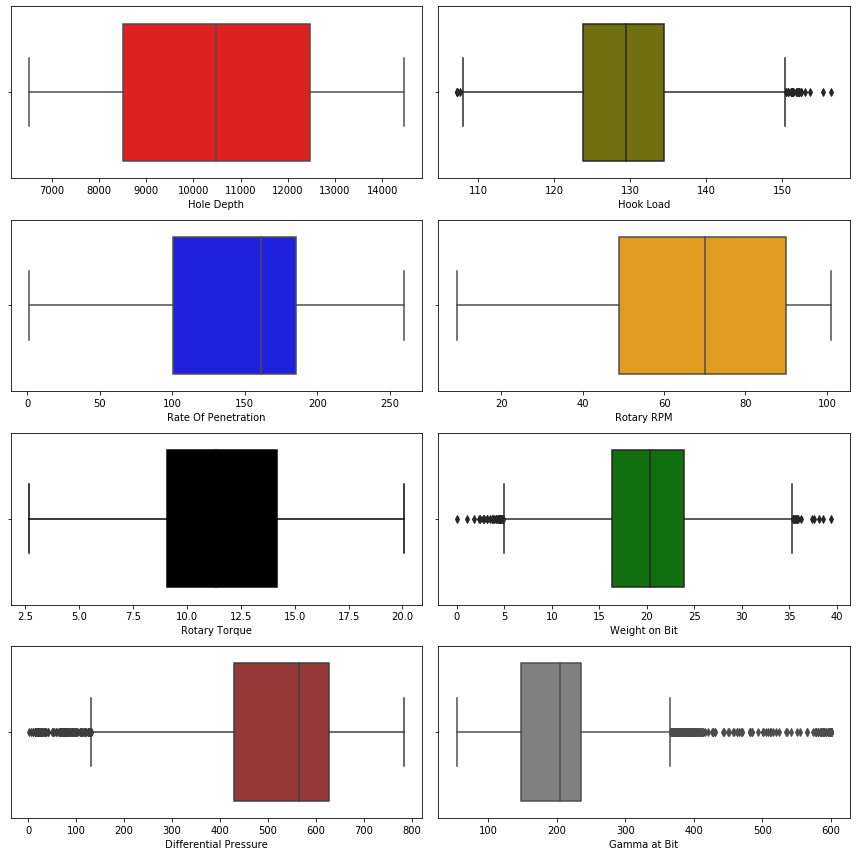

In [3]:
f, axes =plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Hole Depth'], color="red", ax=axes[0, 0])
sns.boxplot(df['Hook Load'], color="olive", ax=axes[0, 1])
sns.boxplot(df['Rate Of Penetration'], color="blue",
ax=axes[1, 0])
sns.boxplot(df['Rotary RPM'], color="orange", ax=axes[1, 1])
sns.boxplot(df['Rotary Torque'], color="black", ax=axes[2, 0])
sns.boxplot(df['Weight on Bit'], color="green", ax=axes[2, 1])
sns.boxplot(df['Differential Pressure'], color="brown",
ax=axes[3, 0])
sns.boxplot(df['Gamma at Bit'], color="gray", ax=axes[3, 1])
plt.tight_layout()

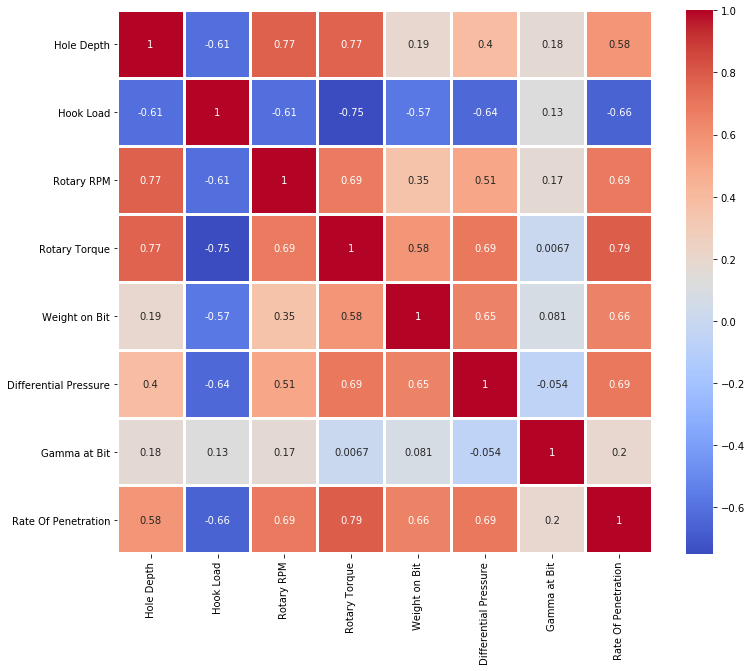

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',
linewidths=2, cmap='coolwarm')

In [5]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df_scaled=scaler.transform(df)

In [6]:
df_scaled=pd.DataFrame(df_scaled, columns=['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque', 'Weight on Bit',
'Differential Pressure', 'Gamma at Bit', 'Rate Of Penetration'])
y_scaled=df_scaled[['Rate Of Penetration']]
x_scaled=df_scaled.drop(['Rate Of Penetration'], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
seed=1000
np.random.seed(seed)
X_train, X_test,y_train, y_test=train_test_split(x_scaled,
y_scaled, test_size=0.30)

In [8]:
from sklearn.svm import SVR
np.random.seed(seed)
SVM =SVR(kernel='rbf', gamma=1.5,C=5)
SVM.fit(X_train,np.ravel(y_train))

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred_train=SVM.predict(X_train)
y_pred_test=SVM.predict(X_test)
corr_train=np.corrcoef(y_train['Rate Of Penetration'],
y_pred_train) [0,1]
print('ROP Train Data r^2=',round(corr_train**2,4),'r=',
round(corr_train,4))

ROP Train Data r^2= 0.8967 r= 0.947


In [10]:
corr_test=np.corrcoef(y_test['Rate Of Penetration'], y_pred_test)[0,1]
print('ROP Test Data rˆ2',round(corr_test**2,4),'r',round(corr_test,4))

ROP Test Data rˆ2 0.901 r 0.9492


Text(0.5, 1.0, 'ROP Testing Actual vs. Prediction')

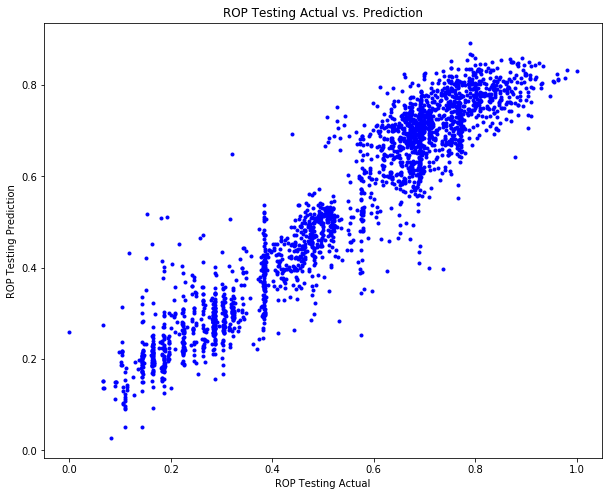

In [11]:
plt.figure(figsize=(10,8))
plt.plot(y_test['Rate Of Penetration'], y_pred_test, 'b.')
plt.xlabel('ROP Testing Actual')
plt.ylabel('ROP Testing Prediction')
plt.title('ROP Testing Actual vs. Prediction')

In [12]:
from sklearn import metrics
print('Testing ROP MAE:', round(metrics.mean_absolute_error(y_test
['Rate Of Penetration'], y_pred_test),4))
print('Testing ROP MSE:', round(metrics.mean_squared_error(y_test
['Rate Of Penetration'], y_pred_test),4))
print('Testing ROP RMSE:', round(np.sqrt
(metrics.mean_squared_error(y_test['Rate Of Penetration'],y_pred_test)),4))

Testing ROP MAE: 0.0514
Testing ROP MSE: 0.0048
Testing ROP RMSE: 0.0689


In [13]:
df_blind=pd.read_csv('Chapter5_ROP_Blind_DataSet.csv')

In [14]:
scaled_blind=scaler.transform(df_blind)

In [15]:
scaled_blind=pd.DataFrame(scaled_blind, columns=['Hole Depth',
'Hook Load', 'Rotary RPM', 'Rotary Torque','Weight on Bit',
'Differential Pressure', 'Gamma at Bit','Rate Of Penetration'])
y_scaled_blind=scaled_blind['Rate Of Penetration']
x_scaled_blind=scaled_blind.drop(['Rate Of Penetration'],axis=1)

In [16]:
y_pred_blind=SVM.predict(x_scaled_blind)

In [17]:
corr_test=np.corrcoef(y_scaled_blind, y_pred_blind) [0,1]
print('ROP Blind Data r^2=',round(corr_test**2,4),'r=',
round(corr_test,4))

ROP Blind Data r^2= 0.6823 r= 0.826


Text(0.5, 1.0, 'ROP Blind Actual vs. Prediction')

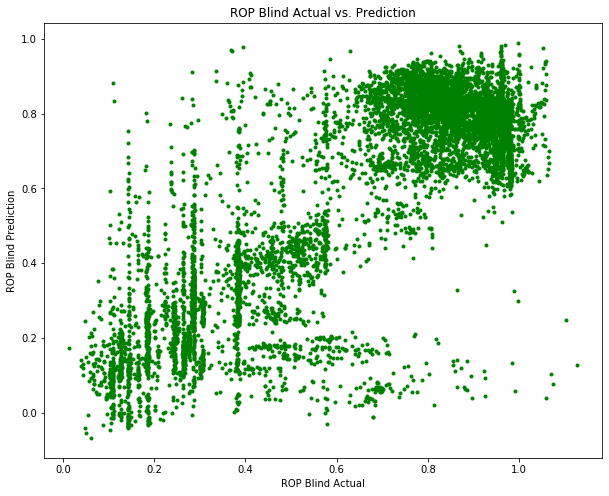

In [18]:
plt.figure(figsize=(10,8))
plt.plot(y_scaled_blind, y_pred_blind, 'g.')
plt.xlabel('ROP Blind Actual')
plt.ylabel('ROP Blind Prediction')
plt.title('ROP Blind Actual vs. Prediction')

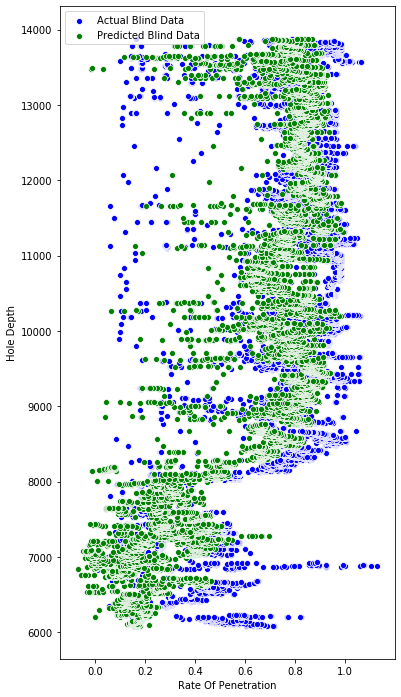

In [19]:
plt.figure(figsize=(6,12))
sns.scatterplot(y_scaled_blind, df_blind['Hole Depth'],
label='Actual Blind Data', color='blue')
sns.scatterplot(y_pred_blind, df_blind['Hole Depth'],
label='Predicted Blind Data', color='green')

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
np.random.seed(seed)
ET=ExtraTreesRegressor(n_estimators=100,criterion='mse',
max_depth=None, min_samples_split=2,
min_samples_leaf=1)
ET.fit(X_train,np.ravel(y_train))
y_pred_train=ET.predict(X_train)
y_pred_test=ET.predict(X_test)
corr_train=np.corrcoef(y_train['Rate Of Penetration'],
y_pred_train) [0,1]
print('ROP Train Data r^2=',round(corr_train**2,4),'r=',
round(corr_train,4))

ROP Train Data r^2= 1.0 r= 1.0


In [21]:
corr_test=np.corrcoef(y_test['Rate Of Penetration'], y_pred_test)\
[0,1]
print('ROP Test Data r^2=',round(corr_test**2,4),'r=',
round(corr_test,4))

ROP Test Data r^2= 0.9503 r= 0.9748


Text(0.5, 1.0, 'ROP Testing Actual vs. Prediction Using Extra Trees Model')

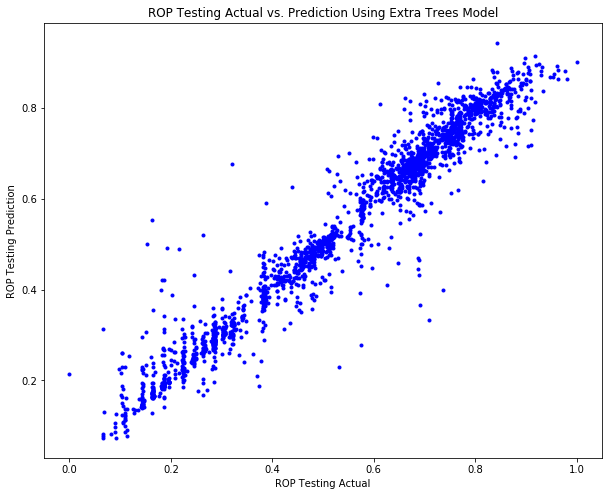

In [22]:
plt.figure(figsize=(10,8))
plt.plot(y_test['Rate Of Penetration'], y_pred_test, 'b.')
plt.xlabel('ROP Testing Actual')
plt.ylabel('ROP Testing Prediction')
plt.title('ROP Testing Actual vs. Prediction Using Extra Trees Model')

In [23]:
y_pred_blind=ET.predict(x_scaled_blind)
corr_test=np.corrcoef(y_scaled_blind, y_pred_blind) [0,1]
print('ROP Blind Data r^2=',round(corr_test**2,4),'r=',
round(corr_test,4))

ROP Blind Data r^2= 0.7476 r= 0.8646


Text(0.5, 1.0, 'ROP Blind Actual vs. Prediction Using Extra Trees Model')

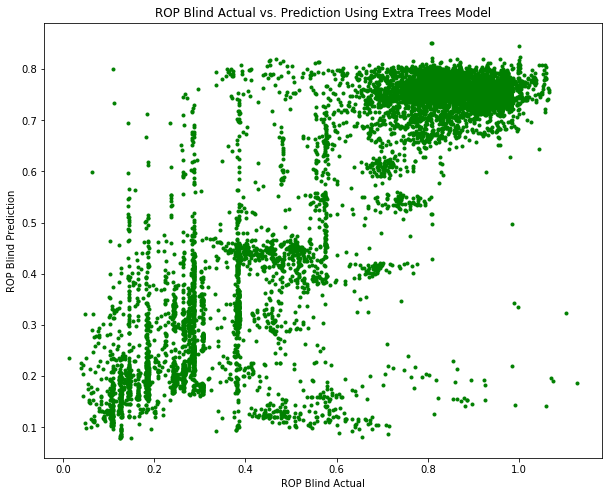

In [24]:
plt.figure(figsize=(10,8))
plt.plot(y_scaled_blind, y_pred_blind, 'g.')
plt.xlabel('ROP Blind Actual')
plt.ylabel('ROP Blind Prediction')
plt.title('ROP Blind Actual vs. Prediction Using Extra Trees Model')

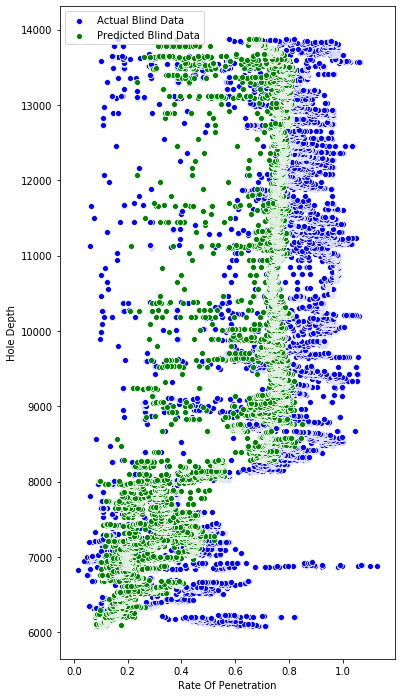

In [25]:
plt.figure(figsize=(6,12))
sns.scatterplot(y_scaled_blind, df_blind['Hole Depth'],
label='Actual Blind Data', color='blue')
sns.scatterplot(y_pred_blind, df_blind['Hole Depth'], label='\
Predicted Blind Data', color='green')

Text(0.5, 1.0, 'Feature Importance Ranking')

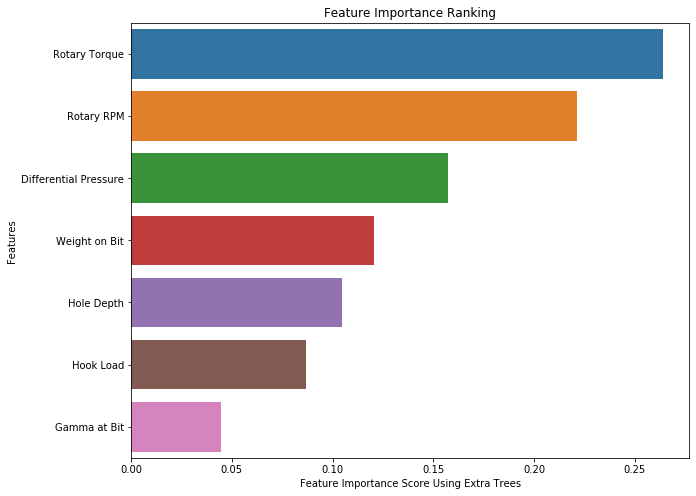

In [26]:
feature_names =df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp =pd.Series(ET.feature_importances_,
index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Extra Trees')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")